# Visualize (parts of) the university network

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from colour import Color
import itertools
from matplotlib.lines import Line2D

In [2]:
network_src = '../data/networks'
data_src = '../data/processed'
dst = '../plots'

In [3]:
G = nx.readwrite.gpickle.read_gpickle(\
        join(network_src, 'university_2019-10-16_to_2019-10-23_fraction-1_all.bz2')) 
studies = pd.read_csv(join(data_src, 'studies_processed.csv'))

In [4]:
study_id_map = studies[['study_id', 'study_name']]\
    .drop_duplicates(subset=['study_id'])
study_id_map = study_id_map.set_index('study_name')

In [5]:
studies[['student_id', 'study_name']]\
    .groupby('study_name')\
    .count()\
    .rename(columns={'student_id':'student_count'})\
    .sort_values(by='student_count', ascending=False)[0:50]

,student_count
study_name,
Bachelorstudium; Informatik,904
Bachelorstudium; Maschinenbau,802
Bachelorstudium; Bauingenieurwiss.u.Wirtschaftsing.wesen,754
Bachelorstudium; Biomedical Engineering,748
Bachelorstudium; Physik,727
Bachelorstudium; Chemie,702
Bachelorstudium; Architektur,681
Bachelorstudium; Molekularbiologie,658
Bachelorstudium; Elektrotechnik,643


In [6]:
study_id_map.loc['Bachelorstudium; Software Engineering and Management']

study_id    UF 033 524
Name: Bachelorstudium; Software Engineering and Management, dtype: object

In [26]:
weekday = False

# Bachelorstudium; Informatik: UF 033 521
# Bachelorstudium; Maschinenbau: UF 033 245
# Bachelorstudium; Elektrotechnik: UF 033 235
# Bachelorstudium; Information and Computer Engineering: UF 033 211
# Bachelorstudium; Bauingenieurwiss.u.Wirtschaftsing.wesen: UF 033 264
# Bachelorstudium; Geodäsie: UF 033 221
# Bachelorstudium; Architektur: UF 033 243
# Bachelorstudium; Softwareentwicklung-Wirtschaft / Bachelorstudium; Software Engineering and Management: UF 033 524
# Bachelorstudium; Verfahrenstechnik: UF 033 273
# Bachelorstudium; Biomedical Engineering: UF 033 253
# Bachelorstudium; Wirtschaftsingenieurwesen-Maschinenbau: UF 033 282
study_name_map = {'UF 033 521':'computer science',
                  'UF 033 245':'mechanical engineering',
                  'UF 033 235':'electrical engineering',
                  'UF 033 211':'information and \ncomputer engineering',
                  'UF 033 264':'civil engineering',
                  'UF 033 221':'geodesy',
                  'UF 033 243':'architecture',
                  'UF 033 524':'software engineering \nand management',
                  'UF 033 273':'chemical and \nprocess engineering',
                  'UF 033 253':'biomedical engineering',
                  'UF 033 282':'mechanical engigeering \nand business economics'}

#selected_studies = ['UF 033 245', 'UF 033 235', 'UF 033 521']
#selected_studies = ['UF 033 264', 'UF 033 221', 'UF 033 243']
#selected_studies = ['UF 033 524', 'UF 033 273', 'UF 033 253']
#selected_studies = ['UF 033 211', 'UF 033 282', 'UF 033 524']
#selected_studies = ['UF 033 211', 'UF 033 282', 'UF 033 524', 'UF 033 235', 
#                    'UF 033 521', 'UF 033 245', 'UF 033 243']
selected_studies = ['UF 033 521', 'UF 033 245', 'UF 033 235',
                    'UF 033 211', 'UF 033 264', 'UF 033 221', 
                    'UF 033 243', 'UF 033 524', 'UF 033 273',
                    'UF 033 253', 'UF 033 282'] # all undergrad

colors = ['#F4D03F', '#5DADE2', '#CB4335'] # yellow, blue, red
colors = ['#e6194B', '#ffe119', '#4363d8', '#bfef45',
          '#3cb44b', '#42d4f4', '#911eb4', '#f58231',
          '#f032e6', '#a9a9a9', '#000000', '#9A6324',
          '#000075', '#469990', '#808000', '#800000']
study_colors = {study:color for study, color in zip(selected_studies, colors)}

In [27]:
def sort_studies(s1, s2):
    study_combination = [s1, s2]
    study_combination.sort()
    study_combination = ' '.join(study_combination)
    return study_combination

In [28]:
mixed_colors = {}
for study_combination in itertools.combinations(selected_studies, 2):
    c1 = Color(study_colors[study_combination[0]])
    c2 = Color(study_colors[study_combination[1]])
    mixed_colors[sort_studies(*study_combination)] = list(c1.range_to(c2, 3))[1].get_hex()

In [29]:
selected_students = [n[0] for n in G.nodes(data=True) \
                         if n[1]['type'] == 'unistudent' and \
                         n[1]['main_study'] in selected_studies]
H = G.subgraph(selected_students)

all_edges = H.edges(keys=True, data='weekday')
if weekday:
    wd_edges = [(u, v, k) for (u, v, k, wd) in all_edges if wd == 1]
    H = H.edge_subgraph(wd_edges).copy()
    
Hcc = sorted(nx.connected_components(H), key=len, reverse=True)
H = H.subgraph(Hcc[0])

In [30]:
len(H.nodes())

5855

In [31]:
selected_student_data = [(n[0], n[1]['main_study']) \
                         for n in H.nodes(data=True) if n[1]['type'] == 'unistudent' and \
                         n[1]['main_study'] in selected_studies]
selected_students = [n[0] for n in selected_student_data]
selected_students_studies = [n[1] for n in selected_student_data]
seleted_students_colors = [study_colors[s] for s in selected_students_studies]
student_study_map = {student:study for student, study in \
                     zip(selected_students, selected_students_studies)}

In [32]:
edgelist = [(u, v) for u, v, e in H.edges(data=True)]
edge_study_list = [(student_study_map[u], student_study_map[v]) for u, v in edgelist]

edge_color_list = []
for s1, s2 in edge_study_list:
    if s1 == s2:
        edge_color_list.append(study_colors[s1])
    else:
        tmp = sort_studies(s1, s2)
        edge_color_list.append(mixed_colors[tmp])

In [33]:
k = 1/np.sqrt(len(H.nodes())) * 2.5
pos = nx.drawing.layout.spring_layout(H, k=k, seed=42)

pos_studies = [np.stack([pos[n] for n, s in student_study_map.items() if s == selected_studies[i]])\
               for i in range(len(selected_studies))]

centroids = [[pos_study[0:, 0].mean(), pos_study[0:, 1].mean()]\
                for pos_study in pos_studies]

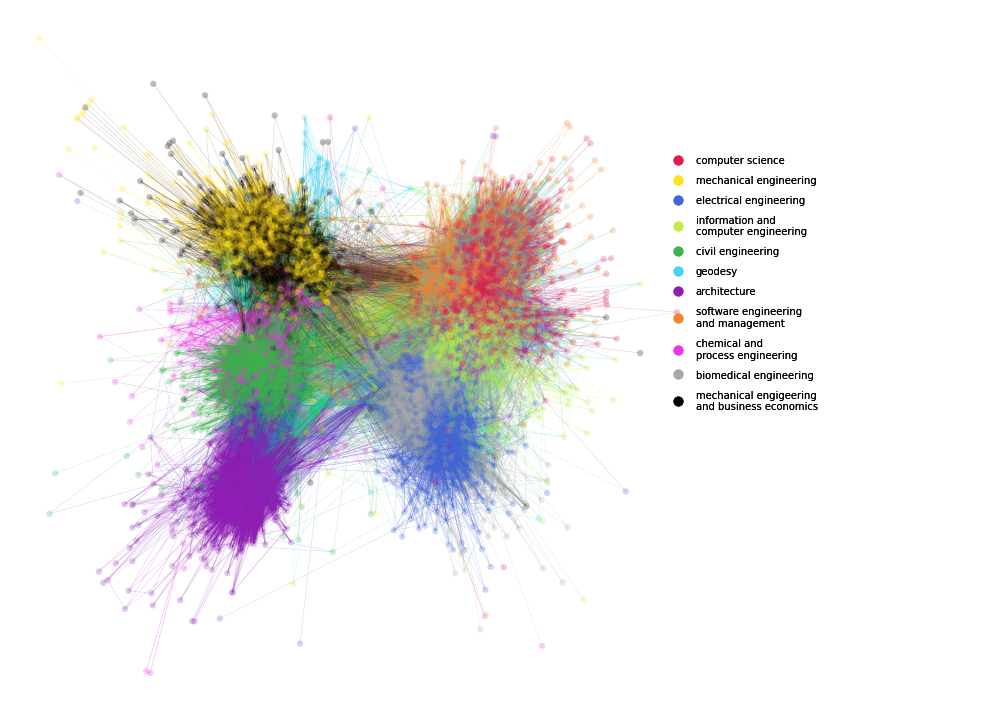

In [34]:
label = 'legend'

fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(1, 7)
ax = fig.add_subplot(gs[0, 0:5])
ax2 = fig.add_subplot(gs[0, 5:])
ax2.set_axis_off()

nx.draw(H, pos, node_size=40, ax=ax, width = 0, nodelist=selected_students, \
       node_color = seleted_students_colors, alpha=0.25, linewidths=0)

nx.draw_networkx_edges(H, pos, edgelist, ax=ax, width=0.5,
                           edge_color=edge_color_list, alpha=0.25)

# either describe the studys in text centered over the cluster
# or add study names as a legend (if too many studies are shown)
if label == 'text':
    for i in range(len(selected_studies)):
        ax.text(*centroids[i], study_name_map[selected_studies[i]], 
                ha='center', fontsize=8)
if label == 'legend':
    study_markers = []
    for s in selected_studies:
        marker = Line2D([0], [0], marker='o', color='w', mew=0,
                          markerfacecolor=study_colors[s], markersize=10,
                          label=study_name_map[s], linestyle='None')
        study_markers.append(marker)
         
    bbox_to_anchor = (1.05, 0.8) # upper center
    
    leg = ax.legend(handles=study_markers, 
              labelspacing=1, loc='upper center', frameon=False,
              fontsize=10, bbox_to_anchor=bbox_to_anchor)
    ax.add_artist(leg)

fname = 'network_visualization_'

if len(selected_studies) == 11:
    fname += 'all_undergrad'
    
else:
    for study in selected_studies[0:-1]:
        fname += study.replace(' ', '-')
        fname += '_'   
    fname += selected_studies[-1].replace(' ', '-')
    
if weekday:
    fname += '_singleday'

fig.tight_layout()
plt.savefig(join(dst, fname + '.pdf'), transparent=True)
#plt.savefig(join(dst, fname + '.eps'), transparent=True)
plt.savefig(join(dst, fname + '.png'), dpi=150, transparent=True)

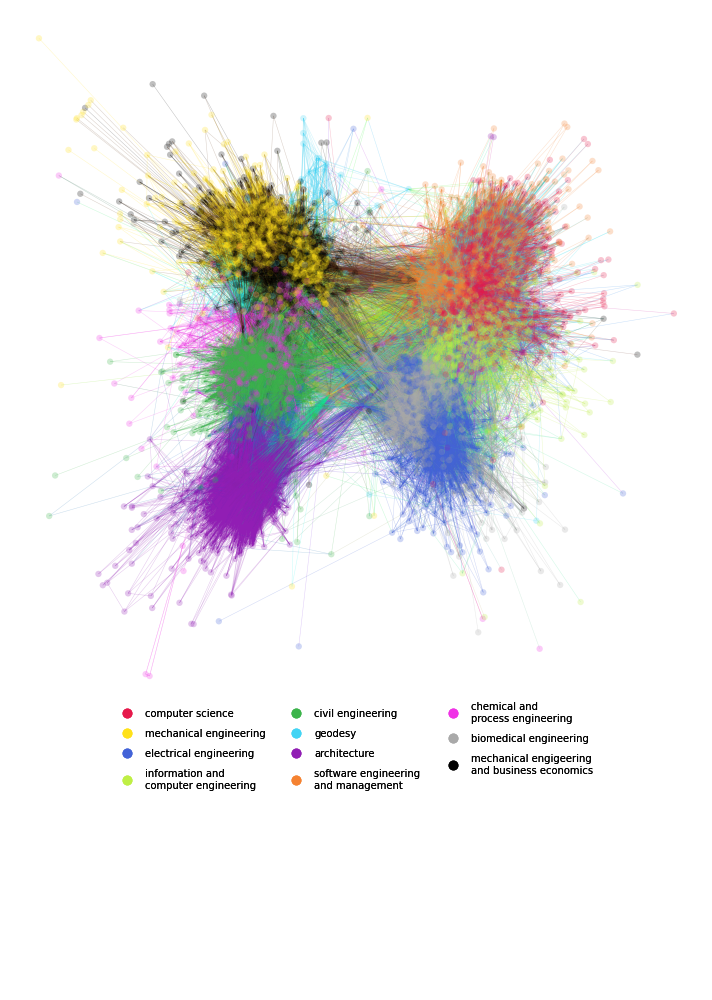

In [47]:
label = 'legend'

fig = plt.figure(figsize=(10, 14))
gs = fig.add_gridspec(7, 1)
ax = fig.add_subplot(gs[0:5, 0])
ax2 = fig.add_subplot(gs[5:, 0])
ax2.set_axis_off()

nx.draw(H, pos, node_size=40, ax=ax, width = 0, nodelist=selected_students, \
       node_color = seleted_students_colors, alpha=0.25, linewidths=0)

nx.draw_networkx_edges(H, pos, edgelist, ax=ax, width=0.5,
                           edge_color=edge_color_list, alpha=0.25)

# either describe the studys in text centered over the cluster
# or add study names as a legend (if too many studies are shown)
if label == 'text':
    for i in range(len(selected_studies)):
        ax.text(*centroids[i], study_name_map[selected_studies[i]], 
                ha='center', fontsize=8)
if label == 'legend':
    study_markers = []
    for s in selected_studies:
        marker = Line2D([0], [0], marker='o', color='w', mew=0,
                          markerfacecolor=study_colors[s], markersize=10,
                          label=study_name_map[s], linestyle='None')
        study_markers.append(marker)
         
    bbox_to_anchor = (0.5, -0.13) # upper center
    
    leg = ax.legend(handles=study_markers, 
              labelspacing=1, loc='lower center', frameon=False,
              fontsize=10, bbox_to_anchor=bbox_to_anchor, ncol=3)
    ax.add_artist(leg)

fname = 'network_visualization_'

if len(selected_studies) == 11:
    fname += 'all_undergrad'
    
else:
    for study in selected_studies[0:-1]:
        fname += study.replace(' ', '-')
        fname += '_'   
    fname += selected_studies[-1].replace(' ', '-')
    
if weekday:
    fname += '_singleday'

fig.tight_layout()
plt.savefig(join(dst, fname + '.pdf'), transparent=True)
plt.savefig(join(dst, fname + '.png'), dpi=150, transparent=True)